In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore,ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.svm import SVC
%matplotlib inline

In [4]:
df =  pd.read_csv("F:\\PGDDS\\PGD_Data_Science\\csv_data\\credit_card_lead\\train.csv")

In [5]:
df.head()

ID  Gender  Age Region_Code     Occupation Channel_Code  Vintage  \
0  NNVBBKZB  Female   73       RG268          Other           X3       43   
1  IDD62UNG  Female   30       RG277       Salaried           X1       32   
2  HD3DSEMC  Female   56       RG268  Self_Employed           X3       26   
3  BF3NC7KV    Male   34       RG270       Salaried           X1       19   
4  TEASRWXV  Female   30       RG282       Salaried           X1       33   

  Credit_Product  Avg_Account_Balance Is_Active  Is_Lead  
0             No              1045696        No        0  
1             No               581988        No        0  
2             No              1484315       Yes        0  
3             No               470454        No        0  
4             No               886787        No        0

In [7]:
df.shape

(245725, 11)

In [8]:
df.drop("ID",axis=1,inplace=True)

In [9]:
df.shape

(245725, 10)

In [10]:
df.size

2457250

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               245725 non-null  object
 1   Age                  245725 non-null  int64 
 2   Region_Code          245725 non-null  object
 3   Occupation           245725 non-null  object
 4   Channel_Code         245725 non-null  object
 5   Vintage              245725 non-null  int64 
 6   Credit_Product       216400 non-null  object
 7   Avg_Account_Balance  245725 non-null  int64 
 8   Is_Active            245725 non-null  object
 9   Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.7+ MB


In [12]:
df.describe()

Age        Vintage  Avg_Account_Balance        Is_Lead
count  245725.000000  245725.000000         2.457250e+05  245725.000000
mean       43.856307      46.959141         1.128403e+06       0.237208
std        14.828672      32.353136         8.529364e+05       0.425372
min        23.000000       7.000000         2.079000e+04       0.000000
25%        30.000000      20.000000         6.043100e+05       0.000000
50%        43.000000      32.000000         8.946010e+05       0.000000
75%        54.000000      73.000000         1.366666e+06       0.000000
max        85.000000     135.000000         1.035201e+07       1.000000

In [13]:
df.nunique()


Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64

In [14]:
df.isnull().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

# 1. look for duplicate values

In [15]:
df.duplicated().sum()

21

# 1.1 removing the duplicate values

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

0

# 2.  replacing the null value

In [18]:
filler= df["Credit_Product"].mode().values[0]
df["Credit_Product"]=df["Credit_Product"].fillna(filler)

In [20]:
df.isnull().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

# data visualization

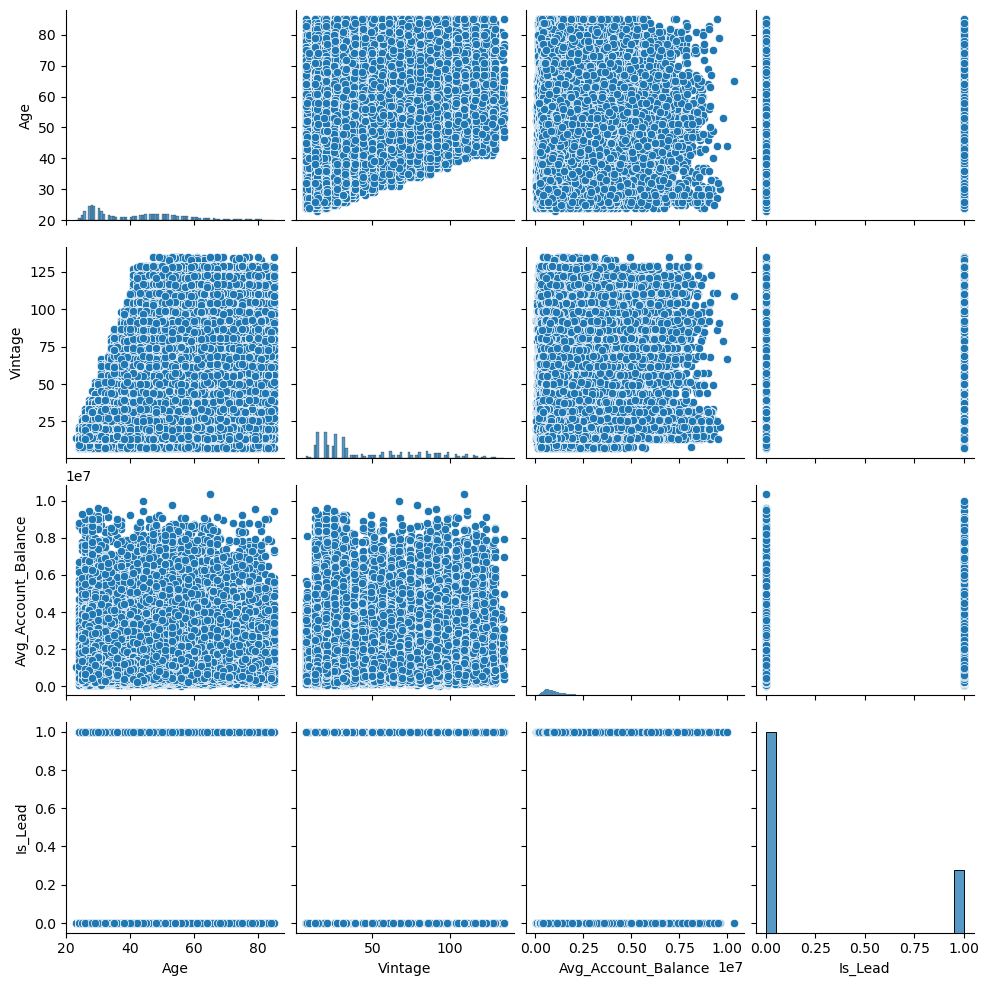

In [24]:
sns.pairplot(df)
plt.show()

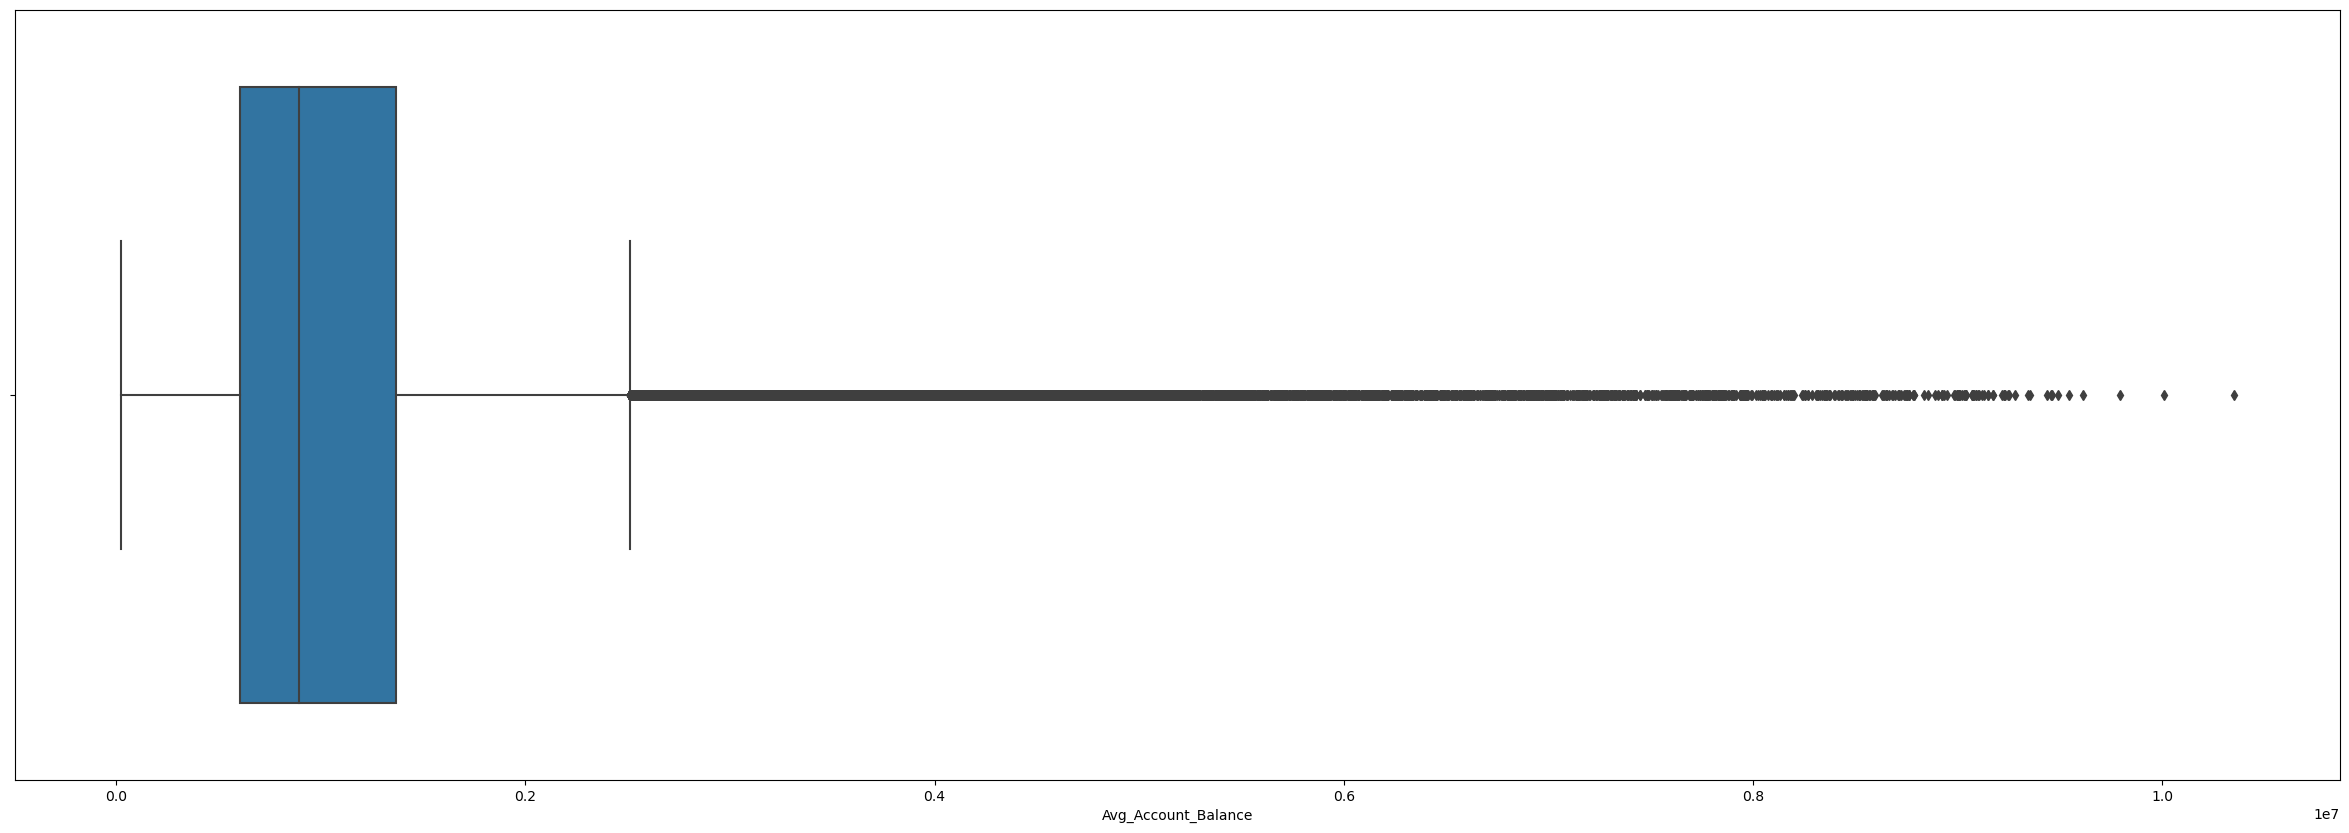

In [25]:
 #looking for outliers
plt.figure(figsize=(30,10))
sns.boxplot(df["Avg_Account_Balance"])
plt.show()

as we can see there are outliers we canâ€™t remove them because they are considrable
outliers

# look for imbalanced data set

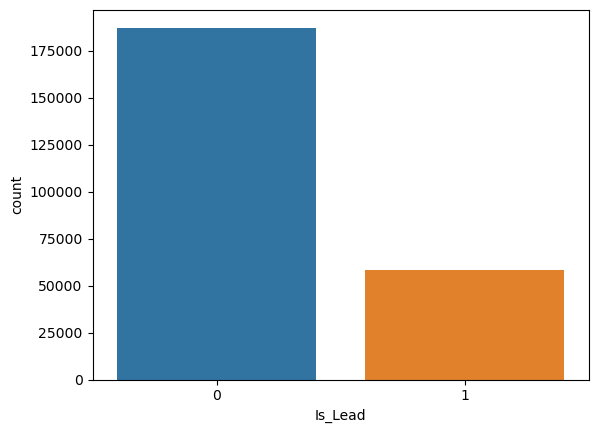

In [26]:
sns.countplot(df["Is_Lead"])
plt.show()

from the above we can take out following points:
1. if we take 100 people than form this 100 peoples only 35 people are our customer

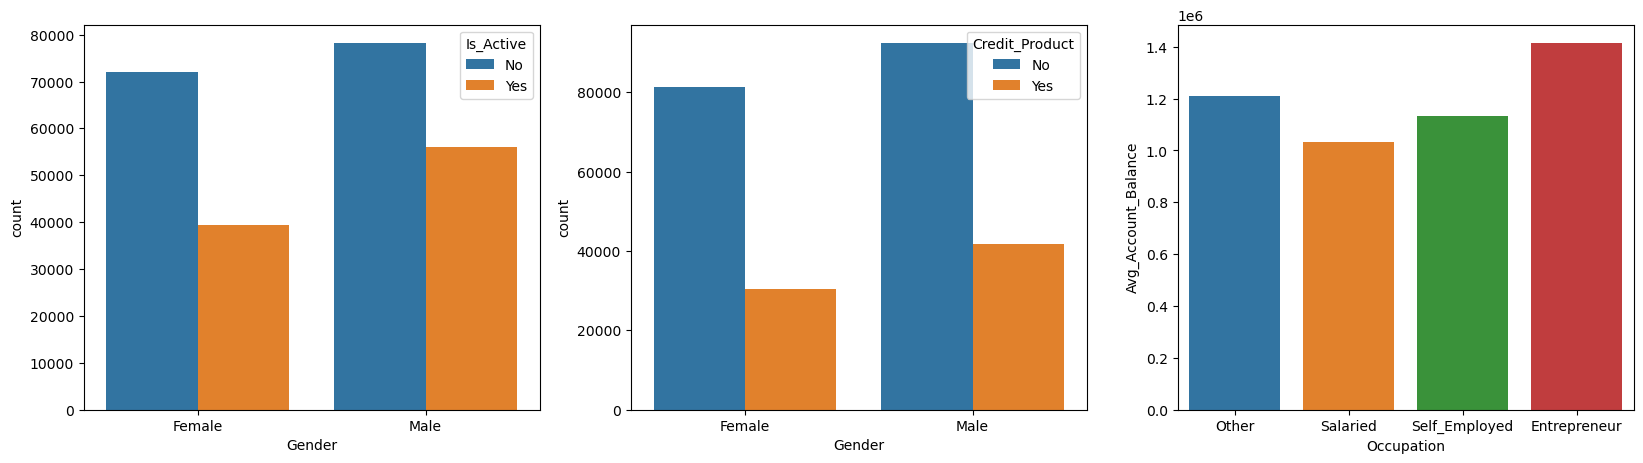

In [30]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot("Gender",hue="Is_Active",data=df)
plt.subplot(1,3,2)
sns.countplot("Gender",hue="Credit_Product",data=df)
plt.subplot(1,3,3)
sns.barplot(df["Occupation"],df["Avg_Account_Balance"],ci=True)
plt.show()

1. first graph shows relation between gender and is_active. following are insight
we get from graph no. 1
    1. In both male and female customer the rate of inactive customer is higher as compared to
active customer
    2. the rate of active male customer is higher as compared to female customer
2. second graph shows relation between gender and credit_product. following
are insight we get from second graph
    1. In both male and female customer the rate of customer having credit_product on there credit
card is higher as compared to customer not having credit_product
    2. male customer having_credit product is higher as compared to female having credit product
3. third graph shows relation between occupation and avg_account_balance.
following are the insight
    1. in the given chart the entrepreneur are having the highest number of account balance

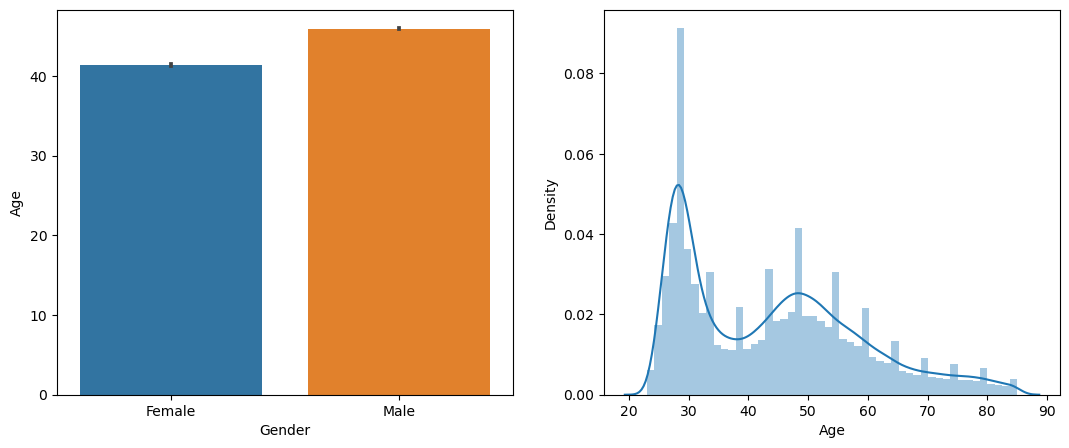

In [31]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.barplot(df["Gender"],df["Age"])
plt.subplot(1,3,2)
sns.distplot(df["Age"])
plt.show()

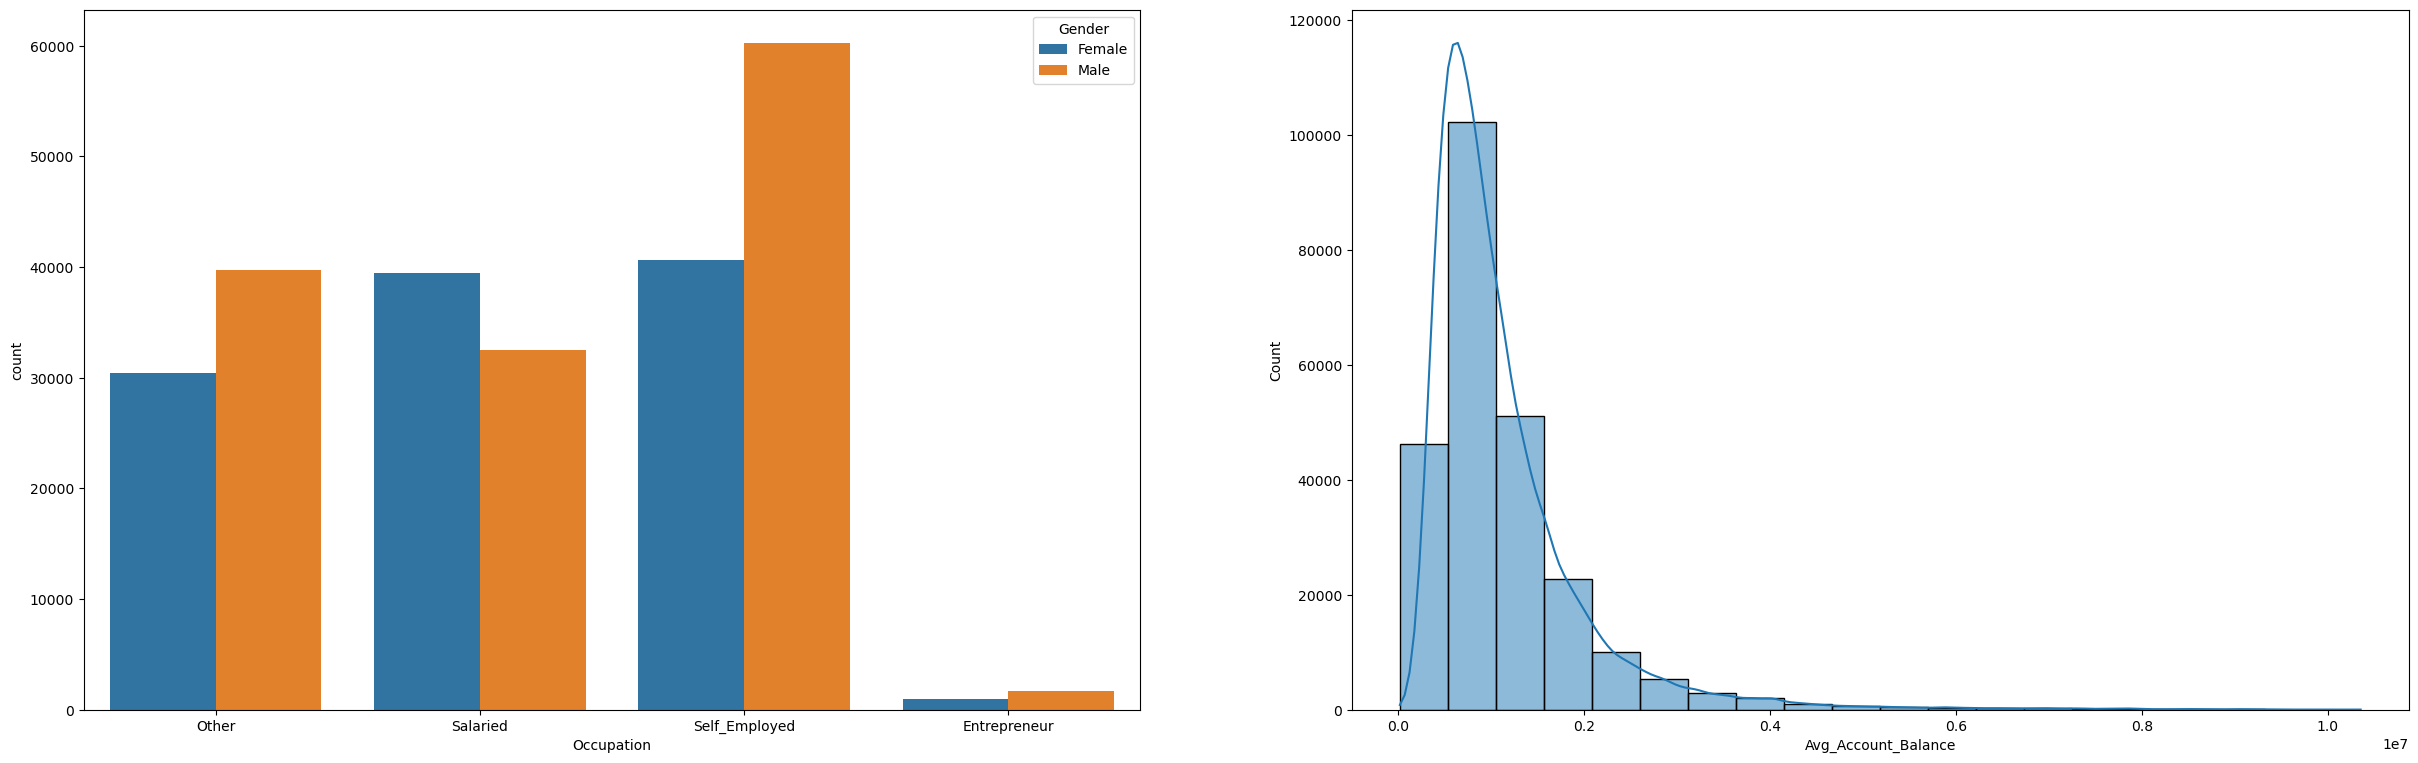

In [32]:
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
sns.countplot("Occupation",hue="Gender",data=df)
plt.subplot(2,2,2)
sns.histplot(df["Avg_Account_Balance"],kde=True,bins=20)
plt.show()